# Experiment 1 - Test the ring structure using aleatory generated networks

In [1]:
# external imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the database
df = pd.read_csv("exp1_aleatory.csv")
df.keys()

Index(['Unnamed: 0', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields'],
      dtype='object')

In [10]:
df.head(100)

,Unnamed: 0,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields
0,0,1,3,5,3,2,2,17,45,16
1,1,2,3,5,3,2,2,14,29,10
2,2,3,3,5,3,2,2,10,15,3
3,3,4,3,5,3,2,2,20,51,15
4,4,5,3,5,3,2,2,13,26,8
...,...,...,...,...,...,...,...,...,...,...
95,95,96,3,5,3,2,2,21,69,33
96,96,97,3,5,3,2,2,15,32,6
97,97,98,3,5,3,2,2,24,73,23
98,98,99,3,5,3,2,2,21,70,31


In [23]:
resultado = df[df['n_local_networks'] == 3]
resultado['n_local_attractors'].max()

34

In [3]:
# Resume
print("Experiment Structural - Ring - Aleatory")
print("Number of samples:", df["i_sample"].max())
print("Range of local networks:", df["n_local_networks"].min(), " - ", df["n_local_networks"].max())

Experiment Structural - Ring - Aleatory
Number of samples: 100
Range of local networks: 3  -  9


<BarContainer object of 700 artists>

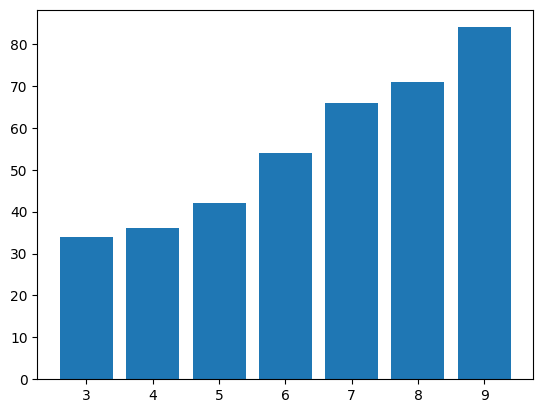

In [25]:
# Crea un gráfico de línea
plt.bar(df["n_local_networks"], df["n_local_attractors"])

<BarContainer object of 700 artists>

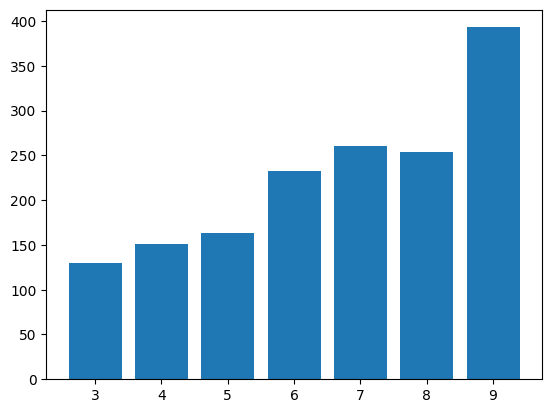

In [5]:
plt.bar(df["n_local_networks"], df["n_pair_attractors"])

<BarContainer object of 700 artists>

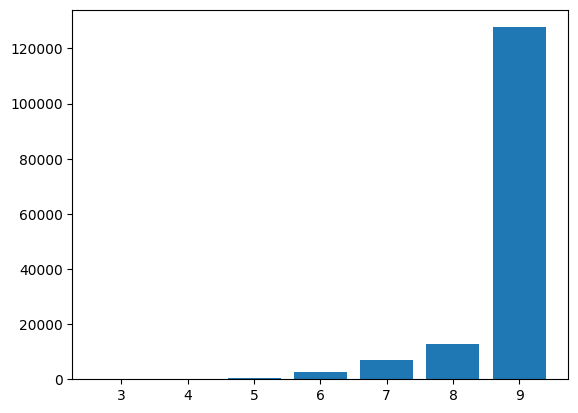

In [6]:
plt.bar(df["n_local_networks"], df["n_attractor_fields"])

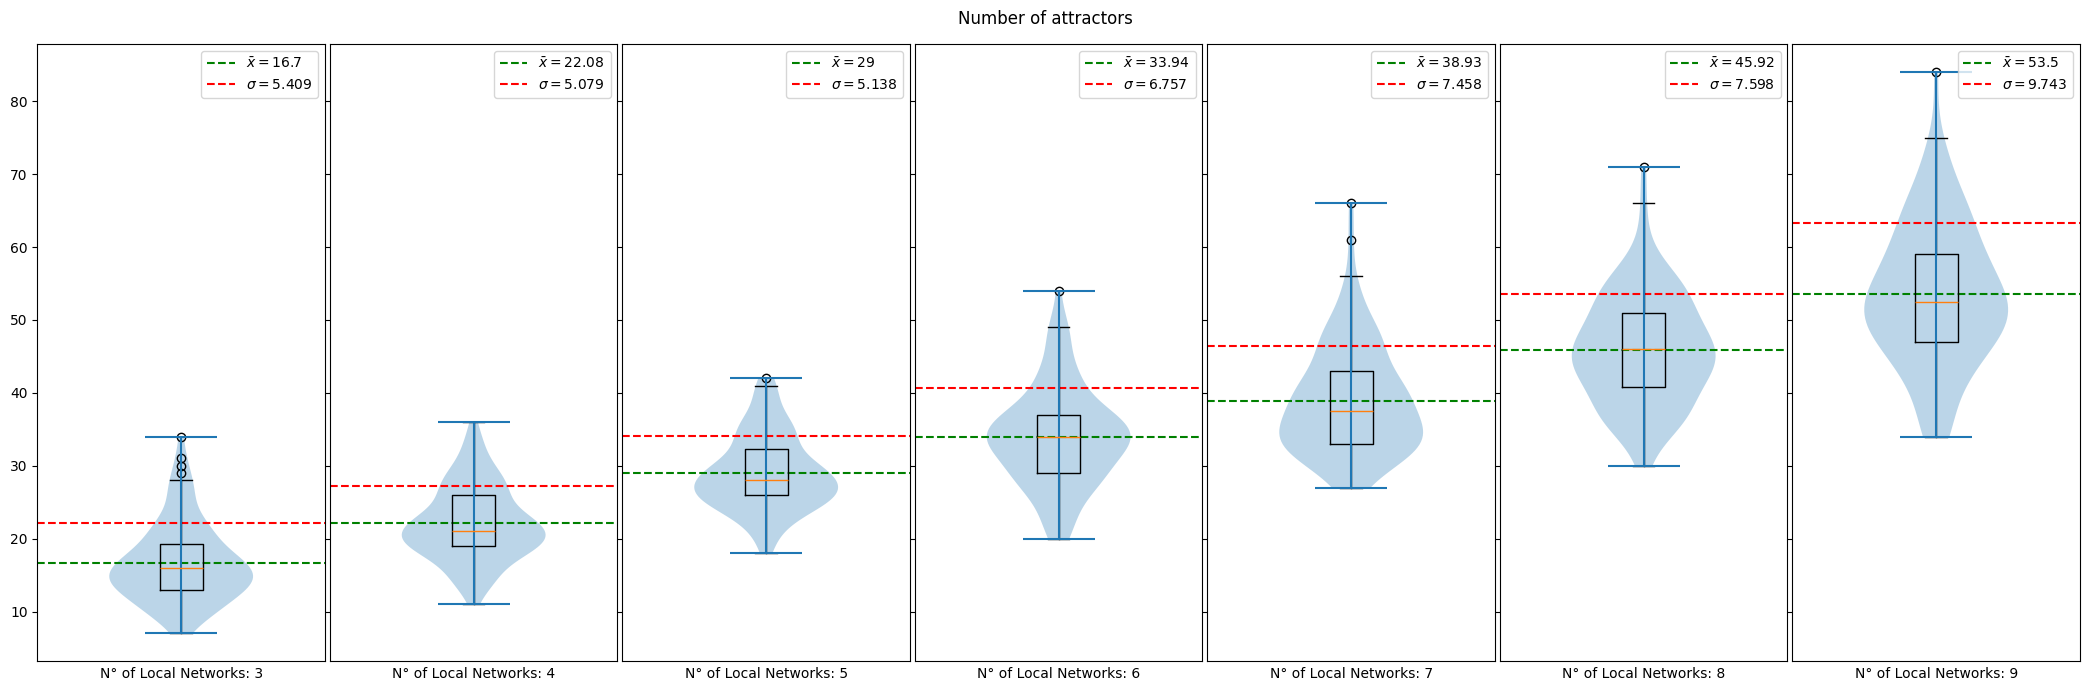

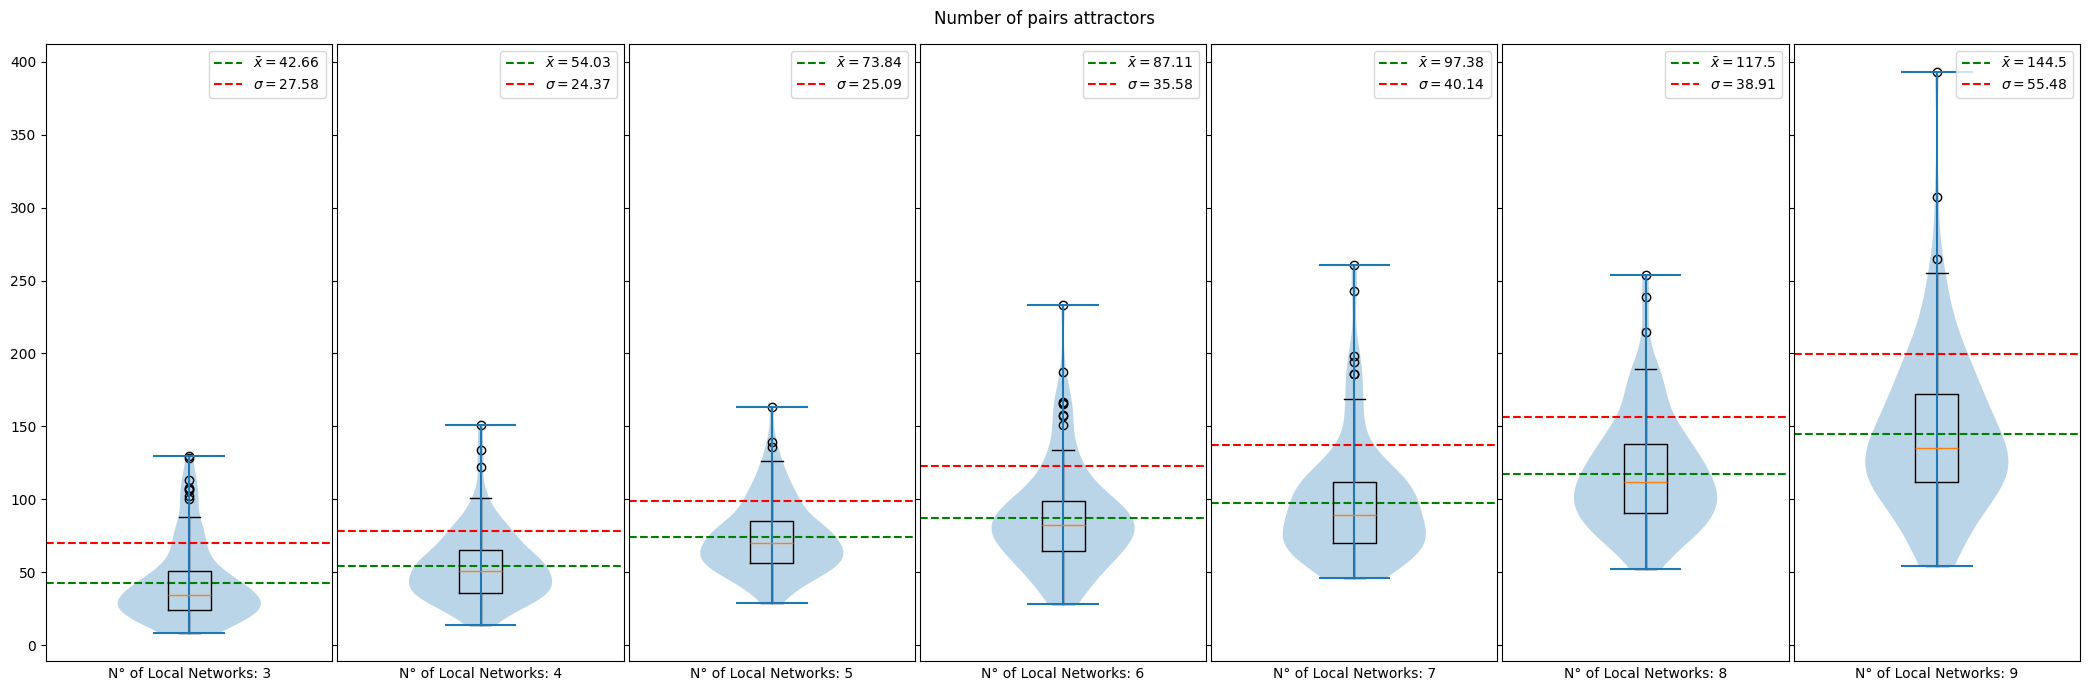

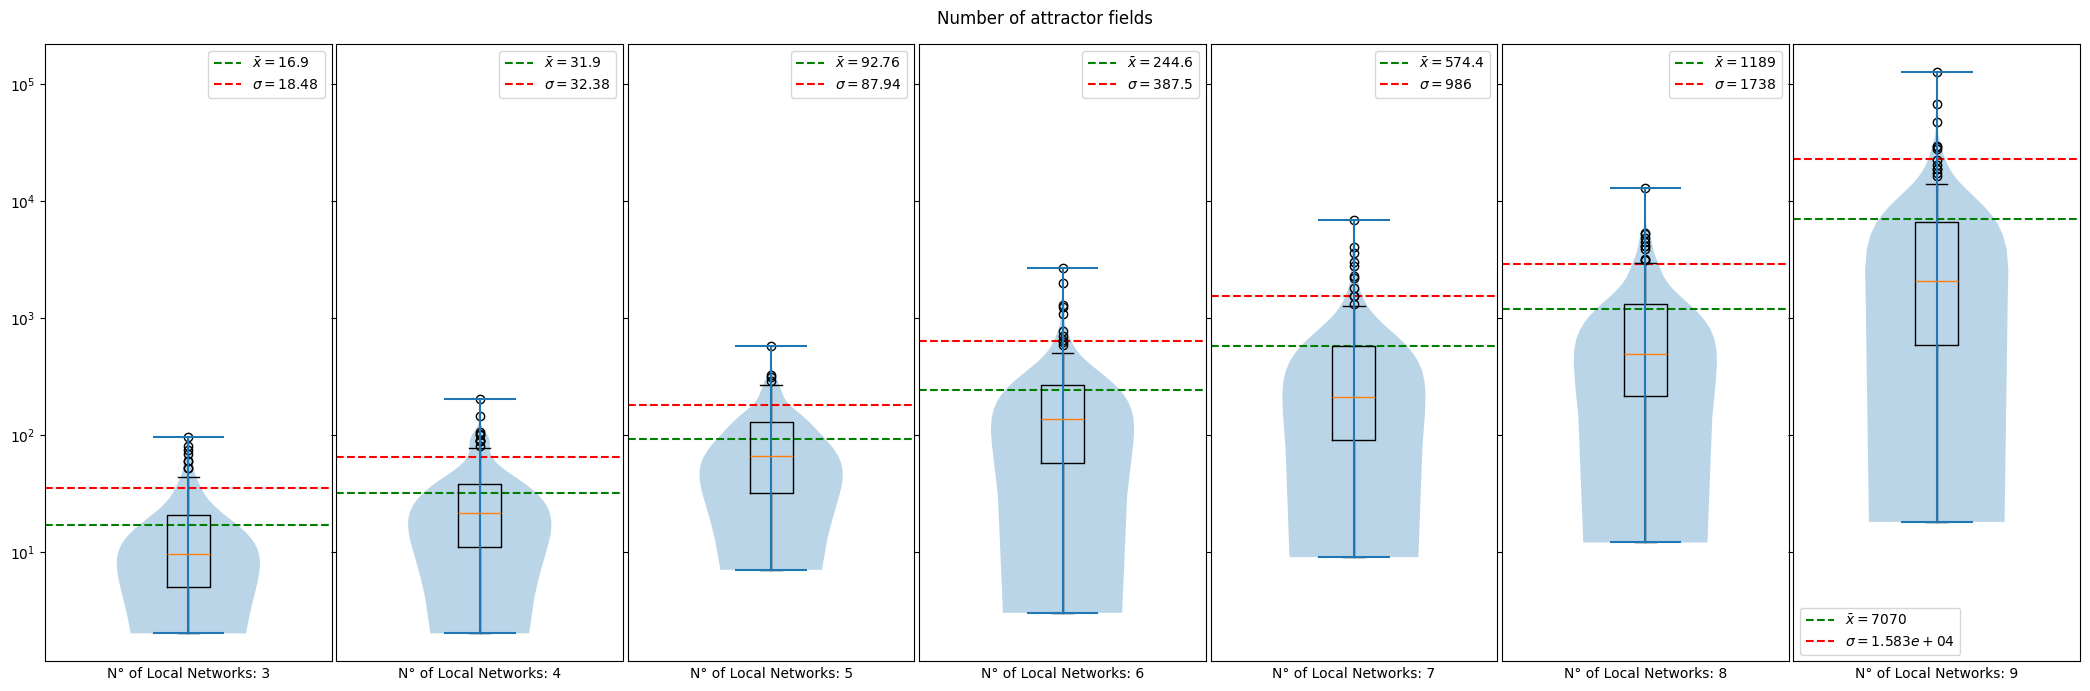

In [7]:
n_local_net = df['n_local_networks'].unique()
labels = {key:label for key, label in zip(df.keys()[-3:], [
          "Number of attractors",
          "Number of pairs attractors",
          "Number of attractor fields"])}
log_scale = {key:label for key, label in zip(df.keys()[-3:], [
          False,
          False,
          True])}
grouped = df.groupby("n_local_networks")

for key in df.keys()[-3:]:
    fig, axs = plt.subplots(1, n_local_net.size, figsize=(n_local_net.size * 3, 7), sharey=True)
    for ax, i_local_net in zip(axs, n_local_net):
        group = grouped.get_group(i_local_net)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Local Networks: {i_local_net}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)